#Task 1: Load and preprocess the dataset

### Import the required libraries (NumPy and Matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

### Load the dataset (linearly separable) using the load_data() method

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### Normalize the dataset by dividing the pixel values by 255

In [3]:
# Normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the features to a 2D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### Split the dataset into training and test sets using train_test_split() method.

In [4]:
# Split the dataset into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Task 2: Visualize the dataset

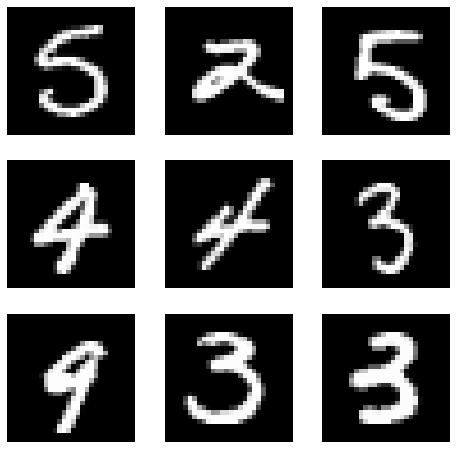

In [5]:
# Visualize some random images
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
axs = axs.flatten()
for i in range(9):
    img = X_train[np.random.randint(0, len(X_train))]
    axs[i].imshow(img.reshape(28,28), cmap='gray')
    axs[i].axis('off')
plt.show()

# Task 3: Implement the Simple Perceptron model

In [6]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs):
        # Initialize the weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Iterate over the training data for the specified number of epochs
        for epoch in range(epochs):
            # Iterate over each training example
            for i in range(X.shape[0]):
                # Compute the output
                z = np.dot(X[i], self.weights) + self.bias
                output = self.activation(z)

                # Compute the weight update
                delta_weights = self.learning_rate * (y[i] - output) * X[i]

                # Update the weights and bias
                self.weights += delta_weights
                self.bias += self.learning_rate * (y[i] - output)

    def predict(self, X):
        # Compute the dot product of the inputs and weights, add the bias, and pass through the activation function
        z = np.dot(X, self.weights) + self.bias
        output = self.activation(z)
        return output

    def activation(self, z):
        # Step function as the activation function
        return np.where(z >= 0, 1, 0)


# Task 4: Train the Simple Perceptron model

In [7]:
perceptron = SimplePerceptron()
perceptron.fit(X_train, y_train, 500)


#Task 5: Evaluate the performance of the Simple Perceptron model on the test set

In [8]:
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("Accuracy:", accuracy*100)

Accuracy: 11.35


# Task 6: Analysis on the results
### Are the accuracy scores satisfactory or not? If not, what measures can be taken to improve the accuracy scores? Please express your ideas in your own words.


**The accuracy score is not satisfactory as you can see the accuracy calculated is very low and there are several reasons for the low accuracy. Firstly, a single simple perceptron can not perform multiclass classification. Secondly, the dataset is very large for a single perceptron to work with. Thirdly, there are no hidden layers. A multi-layer perceptron model having hidden layers to track different patterns in the images can help to classify the above MNIST dataset with accuracy.**

**By incorporating the above stated points in the solution, we can improve the accuracy of the model.** 